<a href="https://colab.research.google.com/github/DITHAAAA/Final-Project-1_Python-For-Data-Science/blob/main/PYTN_KampusMerdeka_fp1_DithaTulNugraha_Group2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project 1 : Linear Regression**

Group 2

1.   Farisa Fikri Mumtaza (PYTN-KS20-03)
2.   Ilham Yusuf (PYTN-KS20-06)
3.   Ditha Tul Nugraha (PYTN-KS20-015)

# **Introduce**

Seiring  berkembangnya Teknologi di bidang transportasi, Uber dan Lyft hadir sebagai dua perusahaan terkemuka dalam industri ride-hailing, memainkan peran krusial dalam menghubungkan pengemudi dan penumpang melalui platform teknologi.

Kita akan menganalisis  faktor-faktor yang mempengaruhi harga dari Uber dan Lyft dari dataset ini yang merupakan data history pemesanan Uber dan Lyft.Selain itu, akan dilakukan juga pemodelan  untuk memprediksi harga kedua metode transportasi tersebut.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import anderson
from statsmodels.stats.diagnostic import normal_ad
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_absolute_error
import sys

import pickle

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    warnings.filterwarnings("ignore", category=UserWarning)


pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set(style='darkgrid')

# **Data Loading**

**load csv ke dataframe**

In [2]:
df = pd.read_csv ('rideshare_kaggle.csv')
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.0330,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1.544969e+09,27.39,1.545044e+09,partly-cloudy-night,32.70,1021.98,57.0,0.72,0.0,10.000,303.8,1.544962e+09,1.544995e+09,0.30,0.1276,1.544980e+09,39.89,1.545012e+09,43.68,1.544969e+09,33.73,1.545012e+09,38.07,1.544958e+09
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.0330,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1.543252e+09,36.20,1.543291e+09,rain,41.83,1003.97,90.0,1.00,0.0,4.786,291.1,1.543233e+09,1.543267e+09,0.64,0.1300,1.543252e+09,40.49,1.543234e+09,47.30,1.543252e+09,36.20,1.543291e+09,43.92,1.543252e+09
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.0330,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1.543320e+09,29.11,1.543392e+09,clear-night,31.10,992.28,240.0,0.03,0.0,10.000,315.7,1.543319e+09,1.543353e+09,0.68,0.1064,1.543338e+09,35.36,1.543378e+09,47.55,1.543320e+09,31.04,1.543378e+09,44.12,1.543320e+09
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.0330,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1.543511e+09,26.20,1.543576e+09,clear-night,26.64,1013.73,310.0,0.00,0.0,10.000,291.1,1.543492e+09,1.543526e+09,0.75,0.0000,1.543507e+09,34.67,1.543550e+09,45.03,1.543511e+09,30.30,1.543550e+09,38.53,1.543511e+09
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.0330,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1.543421e+09,30.29,1.543460e+09,partly-cloudy-night,28.61,998.36,303.0,0.44,0.0,10.000,347.7,1.543406e+09,1.543440e+09,0.72,0.0001,1.543421e+09,33.10,1.543403e+09,42.18,1.543421e+09,29.11,1.543392e+09,35.75,1.543421e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25693,ccec827a-9a9e-4451-b76e-8421e117ca68,1.543420e+09,15,28,11,2018-11-28 15:41:08,America/New_York,Financial District,North End,Lyft,lyft_line,Shared,5.0,1.03,1.0,42.3519,-71.0551,41.24,35.90,Mostly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.60,8.39,12.38,1543431600,10.000,42.60,1543438800,37.33,1543489200,36.56,1.5434

**cek ringkasan dataframe**

In [3]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,2.569800e+04,25698.000000,25698.000000,25698.000000,23687.000000,25698.000000,25698.000000,25698.000000,25698.000000,25698.000000,25698.000000,25698.000000,25698.000000,25698.000000,25698.000000,25698.000000,2.569800e+04,25698.000000,25698.000000,2.569800e+04,25698.000000,2.569800e+04,25698.000000,2.569700e+04,25697.000000,2.569700e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,2.569700e+04,2.569700e+04,25697.000000,25697.000000,2.569700e+04,25697.000000,2.569700e+04,25697.000000,2.569700e+04,25697.000000,2.569700e+04,25697.000000,2.569700e+04
mean,1.544033e+09,11.608841,17.988521,11.575181,16.469055,2.156274,1.015069,42.338388,-71.066230,39.535493,35.808597,0.008933,0.145696,0.740803,6.210613,8.489296,1.544036e+09,8.473229,44.977603,1.544037e+09,34.159187,1.544089e+09,41.524201,1.544037e+09,30.129245,1.544085e+09,31.602726,1009.884399,220.415068,0.685977,0.244231,8.473174,313.897739,1.544014e+09,1.544047e+09,0.579785,0.037399,1.544031e+09,33.429806,1.544028e+09,45.187362,1.544034e+09,29.707905,1.544035e+09,41.888473,1.544035e+09
std,6.876841e+05,6.979559,9.967839,0.494325,9.246480,1.119770,0.095752,0.047544,0.020203,6.742372,7.893867,0.026970,0.328227,0.138296,3.136554,5.246153,6.911219e+05,2.598965,5.966122,6.923917e+05,6.376122,6.909302e+05,7.603215,6.928089e+05,8.003877,6.914653e+05,9.152812,13.528305,99.253331,0.359693,0.469874,2.599000,27.799117,6.897787e+05,6.893023e+05,0.243863,0.055291,6.898354e+05,6.502502,6.887155e+05,5.633708,6.888647e+05,7.113800,6.855878e+05,6.912442,6.898414e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543439e+09,6.000000,13.000000,11.000000,9.000000,1.270000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.710000,124.000000,0.370000,0.000000,8.432000,291.100000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543725e+09,12.000000,17.000000,12.000000,13.500000,2.120000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.920000,7.560000,1.543673e+09,9.882000,44.660000,1.543691e+09,34.180000,1.543712e+09,40.950000,1.543691e+09,30.030000,1.543712e+09,30.320000,1008.970000,259.000000,0.820000,0.000000,9.882000,307.600000,1.543665e+09,1.543699e+09,0.680000,0.000400,1.543684e+09,34.220000,1.543666e+09,44.660000,1.543691e+09,30.130000,1.543662e+09,40.950000,1.543691e+09
75%,1.544816e+09,18.000000,28.000000,12.000000,22.500000,2.870000,1.000000,42.364700,-71.054200,43.580000,40.010000,0.000000,0.000000,0.880000,8.410000,11.980000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.490000,1.544836e+09,44.090000,1.544818e+09,35.320000,1.544836e+09,38.140000

**cek info data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25698 entries, 0 to 25697
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           25698 non-null  object 
 1   timestamp                    25698 non-null  float64
 2   hour                         25698 non-null  int64  
 3   day                          25698 non-null  int64  
 4   month                        25698 non-null  int64  
 5   datetime                     25698 non-null  object 
 6   timezone                     25698 non-null  object 
 7   source                       25698 non-null  object 
 8   destination                  25698 non-null  object 
 9   cab_type                     25698 non-null  object 
 10  product_id                   25698 non-null  object 
 11  name                         25698 non-null  object 
 12  price                        23687 non-null  float64
 13  distance        

# **Data Cleaning**

**Kolom yang akan dipakai**

*hour : kolom ini digunakan untuk mengetahui harga saat pemesanan layanan Uber atau Lyft. Dari kolom ini juga dapat diketahui  ada tidaknya peningkatan harga layanan pada waktu tertentu, misalnya rush hour.

*source : kolom ini digunakan untuk melihat lokasi paling banyak pelanggan memesan layanan Uber atau Lyft

*destination : kolom ini digunakan untuk melihat lokasi tujuan pelanggan layanan Uber atau Lyft

*cab_type : kolom ini digunakan untuk melihat jenis layanan yang digunakan , apakah itu Uber atau Lyft karena kedua layanan tersebut dapat memberikan harga yang berbeda.

*price : kolom ini  merupakan harga dari setiap pemesanan.

*distance : kolom ini  merupakan jarak dari awal lokasi pemesanan dan lokasi tujuan, dan biasanya jarak menentukan harga dari layanan Uber atau Lyft.

*surge_multiplier : kolom ini digunakan sebagai pengali untuk harga standar.

*name : kolom ini digunakan untuk mengetahui jenis mobil yang digunakan karena jenis mobil berpengaruh terhadap harga layanan)

Selain dari kolom tsb, kita tidak menggunakan kolom lain karena tidak relevan terhadap analisis, atau data yang disediakan tidak ada keterangan yang jelas untuk isi dari kolom tersebut.

In [5]:
data = df.copy()[['name', 'hour', 'source' ,'destination', 'cab_type',
              'price', 'distance', 'surge_multiplier']]
data

,name,hour,source,destination,cab_type,price,distance,surge_multiplier
0,Shared,9,Haymarket Square,North Station,Lyft,5.0,0.44,1.0
1,Lux,2,Haymarket Square,North Station,Lyft,11.0,0.44,1.0
2,Lyft,1,Haymarket Square,North Station,Lyft,7.0,0.44,1.0
3,Lux Black XL,4,Haymarket Square,North Station,Lyft,26.0,0.44,1.0
4,Lyft XL,3,Haymarket Square,North Station,Lyft,9.0,0.44,1.0
...,...,...,...,...,...,...,...,...
25693,Shared,15,Financial District,North End,Lyft,5.0,1.03,1.0
25694,Lyft,16,Financial District,North End,Lyft,7.0,1.03,1.0
25695,Shared,1,Financial District,Boston University,Lyft,10.5,5.45,1.0
25696,Lux,4,Financial District,Boston University,Lyft,27.5,5.45,1.0


**Cek data yang terduplikat**

In [6]:
df.duplicated().sum()

0

**Cek missing values data**

In [7]:
data.isnull().sum()

name                   0
hour                   0
source                 0
destination            0
cab_type               0
price               2011
distance               0
surge_multiplier       0
dtype: int64

In [8]:
print('Mean :', data['price'].mean())
print('Median :', data['price'].median())

Mean : 16.469054755773207
Median : 13.5


data null akan di impute oleh nilai median.

In [9]:
data['price'].fillna(data['price'].median(), inplace=True)

data.isnull().sum()

name                0
hour                0
source              0
destination         0
cab_type            0
price               0
distance            0
surge_multiplier    0
dtype: int64

sudah tidak ada nilai null dalam data

# **Eksplorasi Data**

**Distribusi dari Price**

$H0$ : Harga dari Uber dan Lyft terdistribusi secara normal **||**
$H1$  : Harga dari Uber dan Lyft tidak terdistribusi secara normal

In [10]:

# Melakukan uji normalitas Anderson-Darling pada kolom 'price'
p_value = normal_ad(data['price'])

# Mendapatkan nilai p dari hasil uji normalitas
p_value

# Menampilkan nilai p
print("Nilai p dari uji normalitas Anderson-Darling:", p_value)


Nilai p dari uji normalitas Anderson-Darling: (742.0018944876756, 0.0)


$H0$ ditolak karena p-value lebih kecil dari 0.05. Maka distribusi harga dari Uber dan Lyft tidak normal.

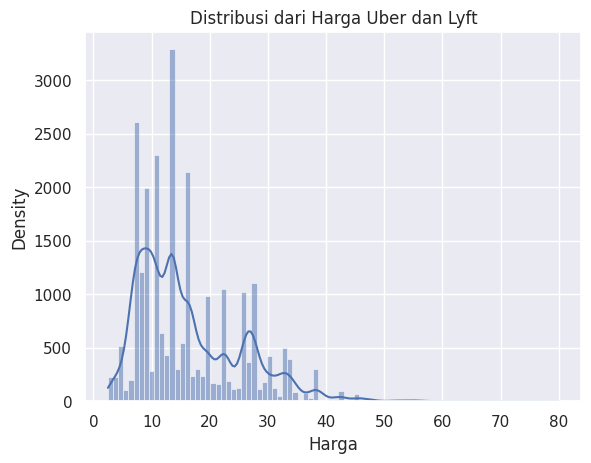

In [11]:
sns.histplot(data['price'], kde=True)


plt.title('Distribusi dari Harga Uber dan Lyft')
plt.xlabel('Harga')
plt.ylabel('Density')

plt.show()

Dari visualisasi di atas, distribusi harga dari layanan Uber dan Lyft tergolong right skewed.

**Central Tendency**

 melakukan pengecekan persebaran data dari distance, karena secara umum jarak menjadi penentu utama dari harga layanan taksi online.

In [12]:
print('Distance mean:',data['distance'].mean())
print('Distance median:',data['distance'].median())
print('Distance mode:',data['distance'].mode()[0])
print('Distance range:',data['distance'].max()-data['distance'].min())
print('Distance standard deviation:',data['distance'].std())
print('Distance variance:',data['distance'].var())

Distance mean: 2.156273639971982
Distance median: 2.12
Distance mode: 1.5
Distance range: 7.44
Distance standard deviation: 1.1197700156177386
Distance variance: 1.2538848878765503


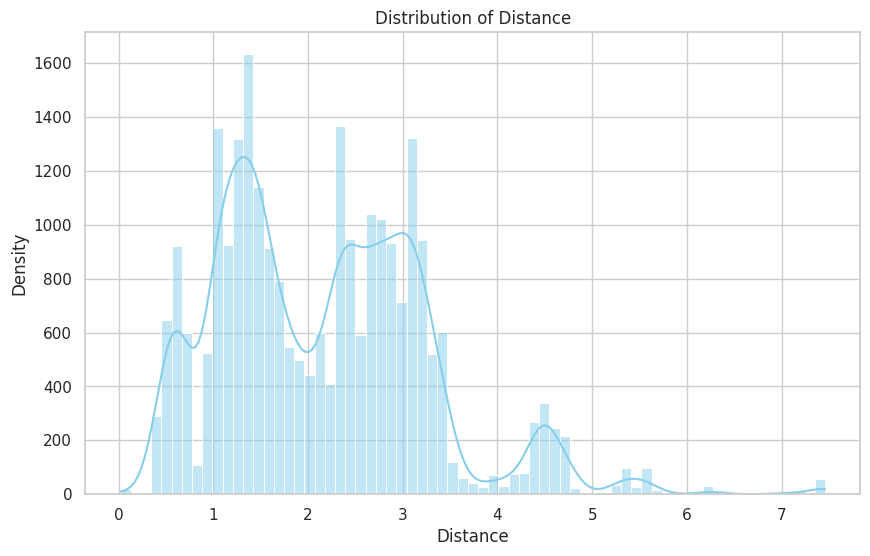

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['distance'], kde=True, color='skyblue')
plt.title('Distribution of Distance')
plt.xlabel('Distance')
plt.ylabel('Density')
plt.show()



Dari visualisasi di atas, distribusi harga dari layanan Uber dan Lyft tergolong right skewed.

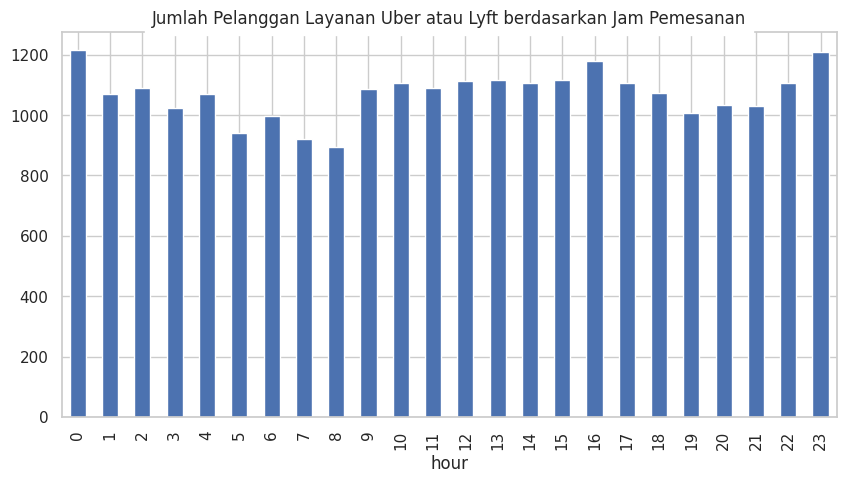

In [14]:
grouped1 = data[['hour']].groupby(['hour']).agg({'hour':'count'})
grouped1.plot(kind='bar', legend=False, figsize=(10,5))
plt.title("Jumlah Pelanggan Layanan Uber atau Lyft berdasarkan Jam Pemesanan", bbox={'facecolor':'1', 'pad':5})
plt.show()

Dari visualisasi di atas, dapat dilihat bahwa pelanggan banyak memesan layanan Uber atau Lyft pada jam 11 dan 12 malam. Sedangkan pelanggan paling sedikit ada pada jam 8 pagi. Pada jam 10 pagi hingga jam 6 sore, terlihat bahwa jumlah pelanggan cenderung stabil.

In [15]:
data['source'].value_counts().head(5)

Fenway                2309
Theatre District      2301
North Station         2224
Financial District    2205
West End              2181
Name: source, dtype: int64

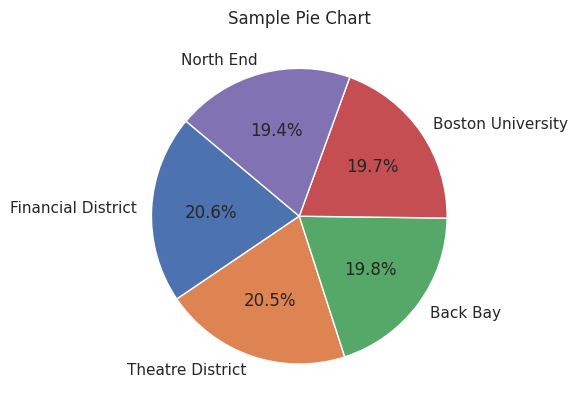

In [16]:
labels = ['Financial District', 'Theatre District', 'Back Bay', 'Boston University', 'North End']

plt.pie(data['source'].value_counts().head(5), labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Sample Pie Chart')
plt.show()

In [17]:
grouped2 = data.groupby(['source']).agg(Count=('source','count'), Price=('price','mean')).reset_index().sort_values(by='Price', ascending=False)
grouped2

,source,Count,Price
2,Boston University,1948,18.582649
3,Fenway,2309,17.762668
4,Financial District,2205,17.731973
8,Northeastern University,2004,17.115269
10,Theatre District,2301,16.292264
7,North Station,2224,16.029451
11,West End,2181,15.977992
0,Back Bay,2154,15.628830
9,South Station,1911,15.575353
1,Beacon Hill,2171,15.499539


Dari hasil groupby titik awal pemesanan di atas, dapat dilihat bahwa pemesanan paling banyak dilakukan dari Financial District. Sedangkan pemesanan paling sedikit dilakukan pada North Station. Namun rata-rata harga dari layanan yang paling tinggi adalah pemesanan yang dilakukan di Boston University dan harga rata-rata termurah dari layanan Uber atau Lyft adalah di Haymarket Square.

In [18]:
data['destination'].value_counts().head(5)

North End                  2331
Haymarket Square           2327
Fenway                     2259
Northeastern University    2224
North Station              2158
Name: destination, dtype: int64

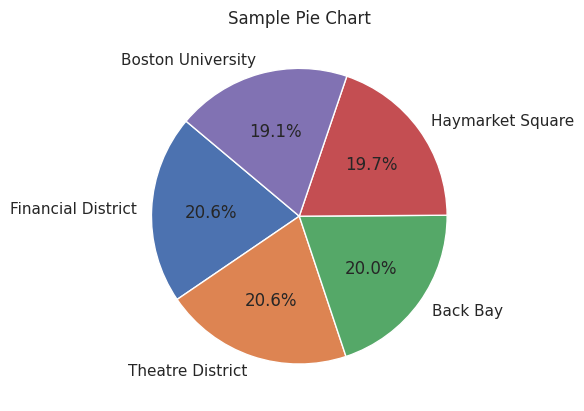

In [19]:
labels = ['Financial District', 'Theatre District', 'Back Bay', 'Haymarket Square', 'Boston University']

plt.pie(data['destination'].value_counts().head(5), labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Sample Pie Chart')
plt.show()

In [20]:
grouped3 = data.groupby(['destination']).agg(Count=('destination','count'), Price=('price','mean')).reset_index().sort_values(by='Price', ascending=False)
grouped3

,destination,Count,Price
2,Boston University,2121,18.259076
3,Fenway,2259,17.773572
4,Financial District,1948,17.756160
8,Northeastern University,2224,17.562275
7,North Station,2158,16.354032
0,Back Bay,2072,16.120174
1,Beacon Hill,2096,15.973521
11,West End,2083,15.860538
10,Theatre District,2105,15.701663
6,North End,2331,14.895324


Dari hasil groupby titik tujuan dari layanan Uber atau Lyft, dapat dilihat bahwa tujuan pelanggan paling banyak ke Financial District. Namun untuk rata-rata harga tertinggi adalah pesanan layanan Uber / Lyft ke tujuan Boston University

**Data Correlation**

In [21]:
correlation_matrix = data.corr(numeric_only=True)
correlation_matrix

,hour,price,distance,surge_multiplier
hour,1.000000,0.000743,0.006887,-0.009798
price,0.000743,1.000000,0.323890,0.233515
distance,0.006887,0.323890,1.000000,0.004604
surge_multiplier,-0.009798,0.233515,0.004604,1.000000


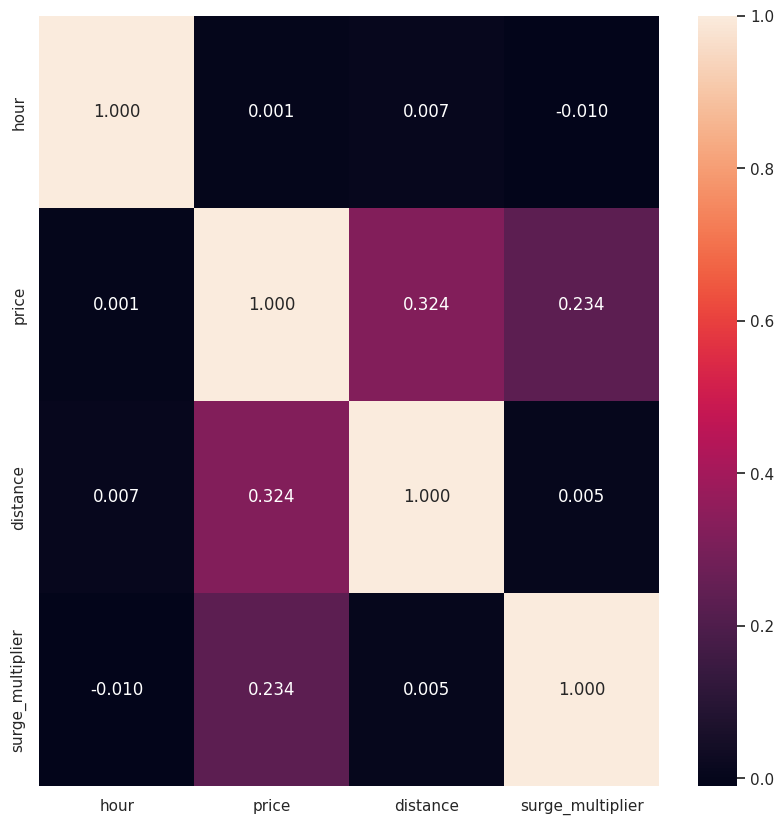

In [22]:

fig = plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt=".3f")
plt.show()

Dari Heatmap di atas, variabel yang memiliki korelasi terkuat dengan price adalah distance dan surge_multiplier.

**Multicollinearity**

In [23]:
def calc_vif(x):
    vif = pd.DataFrame()
    vif['Variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return vif

In [24]:
iv = data[['surge_multiplier','distance']]
calc_vif(iv)

,Variables,VIF
0,surge_multiplier,4.56646
1,distance,4.56646


Karena VIF masih dibawah 5, maka tidak terdapat multikolinearitas antara distance dan surge_multiplie

# **Data Processing**

In [25]:
data1 = data[['name', 'price', 'distance', 'surge_multiplier', 'cab_type']]
data1

,name,price,distance,surge_multiplier,cab_type
0,Shared,5.0,0.44,1.0,Lyft
1,Lux,11.0,0.44,1.0,Lyft
2,Lyft,7.0,0.44,1.0,Lyft
3,Lux Black XL,26.0,0.44,1.0,Lyft
4,Lyft XL,9.0,0.44,1.0,Lyft
...,...,...,...,...,...
25693,Shared,5.0,1.03,1.0,Lyft
25694,Lyft,7.0,1.03,1.0,Lyft
25695,Shared,10.5,5.45,1.0,Lyft
25696,Lux,27.5,5.45,1.0,Lyft


**One-hot Encoding**

One-hot encoding digunakan untuk mengonversi variabel kategorikal menjadi representasi biner (0 atau 1) agar dapat digunakan lebih efektif dalam model machine learning.

In [26]:
categorical = data1[['cab_type','name']]

In [27]:
for i in categorical:
    dummies = pd.get_dummies(data1[i], prefix=i, drop_first=True)
    data1 = pd.concat([data1, dummies], axis=1)
    data1 = data1.drop([i], axis = 1)

In [28]:
data1

,price,distance,surge_multiplier,cab_type_Uber,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,11.0,0.44,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,7.0,0.44,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,26.0,0.44,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,9.0,0.44,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25693,5.0,1.03,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0
25694,7.0,1.03,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0
25695,10.5,5.45,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0
25696,27.5,5.45,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0


**Menyiapkan data untuk pemodelan Machine Learning**

**Split Data**

In [29]:
train, test = train_test_split(data1, test_size=0.3, random_state=11)
train_index = train.index
test_index = test.index
data_inference = data1.drop(train_index)


x_train = train.drop(['price'], axis=1)
y_train = train[['price']]

x_test = test.drop(['price'], axis=1)
y_test = test[['price']]

data_inference = data_inference.drop(['price'], axis=1)

**Scale Data (penskalaan data)**

In [30]:

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)





# **Pendefinisian dan Pelatihan Model**

Model yang akan digunakan adalah Linear Regression, karena dari data yang telah diatas akan dilakukan prediksi harga layanan Uber atau Lyft. Adapun variabel independen dari data ini adalah name, cab_type, surge_multiplier dan distance. Sedangkan variabel dependen dari dataset ini adalah price.

In [31]:
LR = LinearRegression()
model = LR.fit(x_train, y_train)

# **Evaluasi Model**

In [32]:
r_sq_train = model.score(x_train,y_train)
print('Coefficient of determination training data:',r_sq_train)
r_sq_test = model.score(x_test,y_test)
print('Coefficient of determination testing data:',r_sq_test)
print('Intercept:',model.intercept_)
print('Slope:',model.coef_)

Coefficient of determination training data: 0.9219262385800011
Coefficient of determination testing data: 0.9227575412579657
Intercept: [16.21244719]
Slope: [[ 2.87691591  1.56218078  1.12447927  2.57743018 -0.27475101  1.10385001
   3.57359004 -2.41358931 -0.93442641 -3.21710137 -1.82831382 -3.11185379
  -2.86642335 -1.29003294 -2.86528353]]


 didapatkan bahwa akurasi dari training data adalah sebesar 91.78% dan akurasi dari testing data adalah sebesar 91.86%. Karena akurasi testing data lebih besar dibandingkan training data, maka model ini termasuk overfitting walaupun selisih dari akurasi tidak terlalu signifikan.

**Membandingkan model Linear Regression dengan Random Forest Regression**

**Random Forest Regression Tanpa Hyperparameter tuning**

In [33]:
y_train_values = y_train.values.ravel() if len(y_train.shape) > 1 else y_train.values
y_test_values = y_test.values.ravel() if len(y_test.shape) > 1 else y_test.values


rf_reg = RandomForestRegressor(n_estimators=10, random_state=42)

rf_reg.fit(x_train, y_train_values)
train_pred_y = rf_reg.predict(x_train)
test_pred_y = rf_reg.predict(x_test)

importances = rf_reg.feature_importances_
feature_names = x_train

# Gabungkan keduanya
feature_importances = list(zip(feature_names, importances))

print(f"train_MAE = {mean_absolute_error(y_train, train_pred_y)}")
print(f"test_MAE = {mean_absolute_error(y_test, test_pred_y)}")
print('Model Score :', rf_reg.score(x_test, y_test))

train_MAE = 0.8681626035429783
test_MAE = 1.0979853366635448
Model Score : 0.9628834987704795


Karena Mean Absolute Error untuk testing data lebih tinggi dibandingkan training data, maka model ini termasuk overfitting. Accuracy yang didapatkan menggunakan metode ini adalah sebesar 96.56%

Dari perbandingan  diatas, model dengan akurasi yang paling bagus adalah Random Forest Regression tanpa hyperparameter tuning. Maka dari itu akan dilakukan model inference dengan model tersebut.

# **Model Inference**

In [34]:
filename = 'RandomForestReg.pkl'
pickle.dump(rf_reg, open(filename, 'wb'))

In [35]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9628834987704795


In [36]:
scaler = StandardScaler()
x_train = scaler.fit_transform(data_inference)
x_test = scaler.transform(data_inference)

In [37]:
# Pastikan indeks sejajar
y_test.reset_index(drop=True, inplace=True)

y_pred = loaded_model.predict(data_inference)
data_inference['Estimated Y'] = np.round(y_pred,2)
data_inference



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


,distance,surge_multiplier,cab_type_Uber,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV,Estimated Y
25,2.48,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,30.44
27,2.48,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,30.44
31,2.48,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,30.44
38,2.94,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,31.98
39,2.94,1.0,1,0,0,0,0,0,0,0,0,0,0,1,0,31.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25689,1.03,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,26.30
25690,1.03,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,26.30
25695,5.45,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,40.03
25696,5.45,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,40.03


# **Kesimpulan**

Didapatkan Informasi mengenai distribusi jumlah pemesanan berdasar waktu dalam kurun waktu 24 jam, lokasi-lokasi paling banyak dan paling yang dituju pelanggan serta rata-rata harga tertinggi/terendah dari tujuan pemesanan.

Jumlah pelanggan yg banyak memesan layanan Uber atau Lyft pada jam 11 dan 12 malam. Sedangkan pelanggan paling sedikit ada pada jam 8 pagi. Pada jam 10 pagi hingga jam 6 sore, terlihat bahwa jumlah pelanggan cenderung stabil.



Akurasi yang tinggi pada kedua model menunjukkan bahwa keduanya memiliki kinerja yang baik pada data yang digunakan.Didapatkan akurasi yang lebih besar dengan menggunakan pemodelan Random forest regression tanpa hyperparameter tuning sebesar 96.56 % dan menggunakan linear regression sebesar 91.86

Model yang digunakan untuk membuat inferencing menggunakan model Random Forest Regression karena memiliki akurasi yang lebih tinggi dan hasil dari prediksi disimpan ke kolom Estimated Y